In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/processed/data.csv')

In [3]:
df.shape

(7991, 8)

In [4]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Royal Enfield Thunderbird 350cc 2016,2016,15144.0,first,pune,40.0,19.8,115320.0
1,Yamaha FZ16 150cc 2014,2014,NaN,first,bangalore,58.0,13.0,40000.0
2,Royal Enfield Classic 350cc 2018,2018,25000.0,first,chennai,35.0,19.8,136900.0
3,Yamaha MT-15 150cc 2019,2019,5169.0,first,bangalore,NaN,19.0,122374.0
4,Yamaha YZF-R15 150cc 2010,2010,86728.0,first,pune,42.0,16.0,38000.0


In [5]:
df.describe()

,model_year,kms_driven,mileage,power,price
count,7991.000000,5948.000000,2436.000000,2722.000000,7.956000e+03
mean,2015.365161,23319.343981,44.938354,21.793927,9.654656e+04
std,3.767300,30593.748826,16.993680,18.416498,1.805886e+05
min,1950.000000,10.000000,5.000000,7.000000,2.000000e+03
25%,2014.000000,9000.000000,35.000000,14.300000,4.138675e+04
50%,2016.000000,17299.500000,40.000000,19.100000,7.220000e+04
75%,2018.000000,29635.500000,58.000000,23.200000,1.200000e+05
max,2021.000000,1000000.000000,104.000000,202.190000,1.250000e+07


# Handle model_name

### There are too many models, let try to create a brand category using the model name.

In [6]:
df['brand'] = df['model_name'].apply(lambda x: ' '.join(x.split()[:1]))

In [7]:
df.sample(5)

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand
3497,KTM Duke 200cc ABS 2019,2019,7000.0,first,kolkata,NaN,NaN,152200.0,KTM
412,Royal Enfield Classic Gunmetal Grey 350cc 2017,2017,16805.0,first,delhi,35.0,19.8,132000.0,Royal
7337,Bajaj Pulsar AS150 2015,2015,12000.0,first,delhi,NaN,NaN,40000.0,Bajaj
4975,Bajaj Pulsar RS200 ABS 2019,2019,NaN,first,jabalpur,NaN,NaN,135000.0,Bajaj
4238,Royal Enfield Classic 350cc 2017,2017,38600.0,first,mumbai,NaN,NaN,145250.0,Royal


In [8]:
df.brand.value_counts()

Bajaj               2173
Royal               1782
Hero                 879
Yamaha               806
TVS                  580
Honda                567
KTM                  511
Suzuki               244
UM                   133
Harley-Davidson       91
Jawa                  57
Mahindra              37
Kawasaki              36
Benelli               20
Hyosung               19
Husqvarna             18
Ducati                 9
Triumph                9
BMW                    7
BenelliImperiale       6
Fb                     3
yamaha                 1
Aprilia                1
MV                     1
Yazdi                  1
Name: brand, dtype: int64

### We can also extract the engine details as cc from model_name

In [9]:
import re
def extract_cc(val):
    match =  re.search(r"\d{2,}(cc)", val) 
    if match:
        return match.group().replace('cc','')
    else:
        return None
    

df['engine'] = df['model_name'].apply(extract_cc)

In [10]:
df.sample(5)

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,engine
2789,Hero Splendor Plus Self Alloy 100cc 2018,2018,25000.0,first,jamnagar,55.0,8.2,45000.0,Hero,100
4520,Yamaha YZF-R15 2.0 150cc 2015,2015,38000.0,first,ramanathapuram,NaN,NaN,78700.0,Yamaha,150
1137,Bajaj Avenger Street 220 ABS 2019,2019,3200.0,first,chandigarh,45.0,14.3,120000.0,Bajaj,None
3555,Bajaj Discover 135cc 2007,2007,17000.0,first,delhi,NaN,NaN,18000.0,Bajaj,135
3208,Royal Enfield Thunderbird 350cc 2007,2007,37680.0,second,bangalore,NaN,NaN,45000.0,Royal,350


### We can now drop the model_name feature

In [11]:
df = df.drop('model_name',axis=1)

# Handle model_year

We can use model_year to calculate the age of the bike, Age might give us the better results or representation

In [12]:
from datetime import date
current_year = date.today().year

df['age'] = df.model_year.apply(lambda x: current_year - x if x else None )

### Let's drop the model_year

In [13]:
df = df.drop('model_year',axis=1)

# Handle kms_driven

### Missing values will be hanled latter

# Handle owner

In [14]:
# remove whitespace
df['owner'] = df.owner.str.strip()

In [15]:
df.owner.unique()

array(['first', 'second', 'third', 'fourth'], dtype=object)

In [16]:
print(df.owner.isnull().sum())

0


### Let's leave here only other things will handle during encoding

# Handle location

In [17]:
df.location.value_counts()[:10]

delhi         1499
bangalore      797
mumbai         777
chennai        346
jaipur         336
gurgaon        336
hyderabad      323
pune           320
ahmedabad      249
chandigarh     172
Name: location, dtype: int64

## Let's take only top 5 locations and make other as 'others'

In [18]:
top_locations = df.location.value_counts().index[:5]
print(top_locations)

Index(['delhi', 'bangalore', 'mumbai', 'chennai', 'jaipur'], dtype='object')


In [19]:
df['location'] = df.location.apply(lambda x: x if x in top_locations else 'other')

# Handle mileage

### Nothing to do much here,missing values will be handle latter

# Handle power

### Nothing to do much here,missing values will be handle latter

# Handle brand

In [20]:
# Let's check how may brands we get
print('Unique Brands :',len(df['brand'].unique()))
df['brand'].value_counts()[:10]

Unique Brands : 25


Bajaj              2173
Royal              1782
Hero                879
Yamaha              806
TVS                 580
Honda               567
KTM                 511
Suzuki              244
UM                  133
Harley-Davidson      91
Name: brand, dtype: int64

### Let's take only top 10 brands as our base brand & make other as 'other' category

In [21]:
top_brands = df['brand'].value_counts().index[:10]
df['brand'] = df['brand'].apply(lambda x: x if x in top_brands else 'other')

### Let's change the 'Royal' to 'Royal Enfield' as the actual brand

In [22]:
df['brand'] = df.brand.str.replace('Royal','Royal Enfield')

# Reorder the columns

In [23]:
# new_order = ['brand','model_year','kms_driven','owner','location','price']
# new_order = [6,0,1,2,3,4,6,7,8,5]
# df = df[df.columns[new_order]]

In [24]:
df.sample(4)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
3112,NaN,first,other,NaN,NaN,53900.0,TVS,160,5
5562,26000.0,first,bangalore,NaN,NaN,20000.0,Hero,100,10
7623,16206.0,first,other,NaN,NaN,19000.0,Bajaj,125,9
3494,12500.0,first,mumbai,NaN,NaN,130000.0,Royal Enfield,350,3


In [25]:
df.shape

(7991, 9)

# Outlier Detection

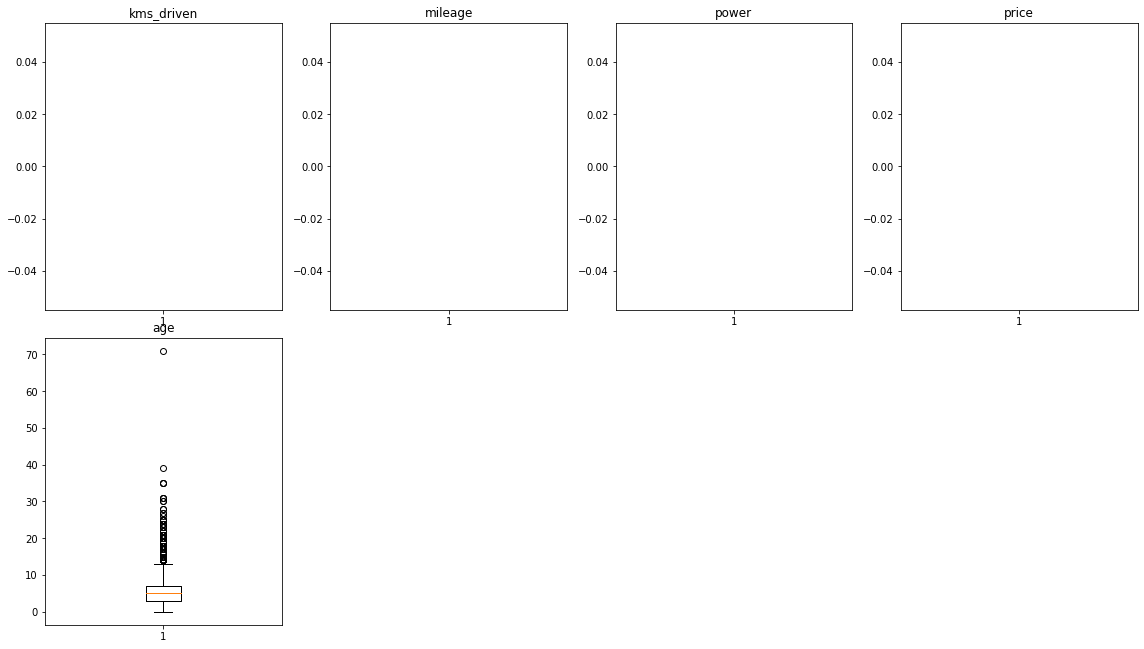

In [26]:
def box_plot(df):
    numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
    # outlier detection using boxplot
    plt.figure(figsize=(16,22))

    for i, variable in enumerate(numeric_columns):
        plt.subplot(5,4,i+1)
        plt.boxplot(df[variable],whis=1.5)
        plt.tight_layout()
        plt.title(variable)

    plt.show()

box_plot(df)

## kms_driven

In [27]:
max_val = df['kms_driven'].quantile(.99)

min_val = df['kms_driven'].quantile(.1)

df = df[(df['kms_driven'] <= max_val) & (df['kms_driven'] > min_val)]

In [28]:
df.shape

(5274, 9)

<AxesSubplot:>

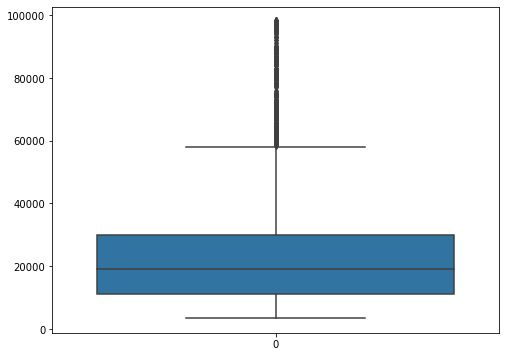

In [29]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df['kms_driven'])

## Mileage

In [30]:
# max_val = df['mileage'].quantile(.99)

# min_val = df['mileage'].quantile(.1)

# df = df[(df['mileage'] <= max_val) & (df['mileage'] > min_val)]

<AxesSubplot:ylabel='mileage'>

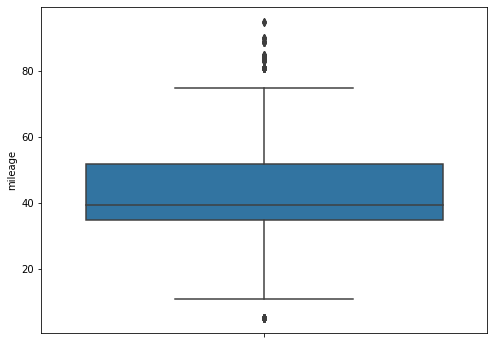

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['mileage'])

## Power

In [32]:
# plt.figure(figsize=(8,6))
# sns.boxplot(y=df['power'])

## Age

<AxesSubplot:ylabel='age'>

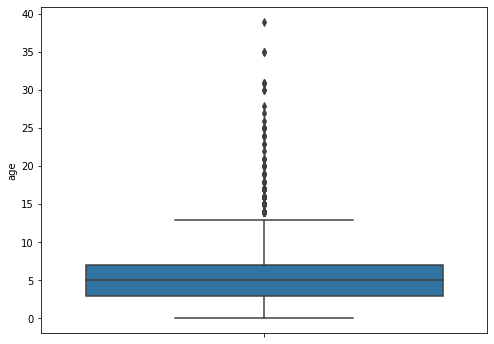

In [33]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['age'])

### More than 20 years old bikes are not that much good enough to be bought by anyone,let's take only age upto 20 years.

In [34]:
df.sample(3)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
1474,29000.0,first,mumbai,45.0,17.0,47000.0,Bajaj,180,6
3237,18000.0,first,other,NaN,NaN,35216.0,Bajaj,150,6
6298,12500.0,first,bangalore,NaN,NaN,70000.0,Bajaj,None,4


In [35]:
df = df[df['age'] <= 20]

In [36]:
df.sample(3)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
491,15000.0,first,other,NaN,NaN,72037.0,Bajaj,None,3
2931,5000.0,first,mumbai,NaN,NaN,150000.0,Royal Enfield,350,2
7781,10362.0,first,delhi,NaN,NaN,41500.0,Hero,100,5


<AxesSubplot:ylabel='age'>

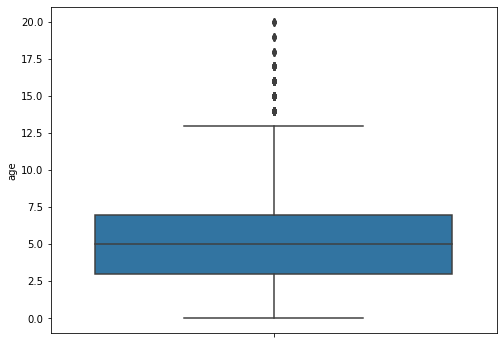

In [37]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['age'])

## Price

In [38]:
max_val = df['price'].quantile(.99)

min_val = df['price'].quantile(.1)

# df = df[(df['price'] <= max_val) & (df['price'] > min_val)]

<AxesSubplot:ylabel='price'>

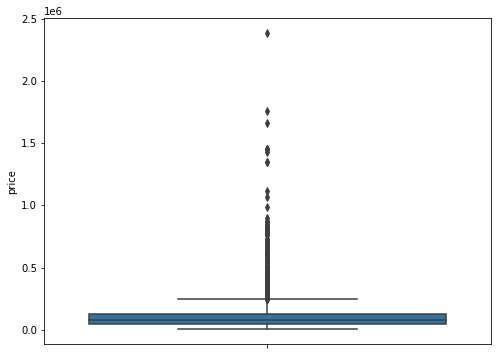

In [39]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['price'])

In [40]:
df.sample(5)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
1934,48000.0,first,delhi,65.0,17.0,42000.0,Bajaj,180,5
544,10168.0,first,delhi,45.0,13.0,44000.0,Yamaha,150,6
1312,8332.0,first,other,NaN,14.6,80000.0,Suzuki,150,3
5923,27000.0,second,other,NaN,NaN,100000.0,Royal Enfield,500,7
5981,13000.0,first,other,NaN,NaN,109800.0,Royal Enfield,350,6


In [41]:
# fill price with mean
df.price.fillna(df.price.mean(),inplace=True)

In [42]:
df.isnull().sum()

kms_driven       0
owner            0
location         0
mileage       3656
power         3470
price            0
brand            0
engine        1070
age              0
dtype: int64

In [45]:
df.shape

(5247, 9)

## Save

In [44]:
## Save the processed data
df.to_csv('../data/processed/processed.csv',index=False)